<a href="https://colab.research.google.com/github/rebeccadimatteo/csDetector/blob/Explainability/explainability/DatasetCSDETECTOR_BCE_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LETTURA FILE CSV

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from six.moves import urllib

import seaborn as sb
from matplotlib import style

style.use('seaborn-whitegrid')

plt.rcParams['figure.figsize'] = (40,20)

DOWNLOAD_ROOT="https://raw.githubusercontent.com/gianwario/csDetector/master/Datasets/datasets.csv"

#fetch dataset da github
def fetch_file_data1(file_url1=DOWNLOAD_ROOT, file_path1="file"):
  os.makedirs(file_path1, exist_ok=True)
  csv_path1 = os.path.join(file_path1, "datasets.csv")
  urllib.request.urlretrieve(file_url1, csv_path1)
fetch_file_data1()

#df è la variabile che contiene il dataset
df=pd.read_csv("file/datasets.csv")
df.head(4)

<ipython-input-2-e17ef1e6fa35>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


,Project url,NoD,NAD,NCD,SDC,NoCD,PCD,NSD,PSD,NPR,...,OSE,BCE,PDE,SV,OS,SD,RS,TFS,UI,TC
0,https://github.com/google/tangent.git,15,30.40,68,8.09,12,0.80,4,0.26,44,...,0,0,0,0,1,0,0,1,1,0
1,https://github.com/keras-team/keras-applicatio...,12,98.66,91,14.78,1,0.08,6,0.50,45,...,1,1,1,1,1,1,1,0,1,0
2,https://github.com/tensorflow/ranking.git,20,115.95,213,20.87,4,0.20,8,0.40,27,...,1,1,1,0,0,0,0,0,0,1
3,https://github.com/minimaxir/textgenrnn.git,19,65.26,174,29.12,1,0.05,9,0.47,35,...,1,1,1,0,1,1,1,0,1,0


DATA CLEANING

In [ ]:
#verifica se ci sono dati nulli nel dataset
df.isnull().any()

Project url    False
NoD            False
NAD            False
NCD            False
SDC            False
               ...  
SD             False
RS             False
TFS            False
UI             False
TC             False
Length: 61, dtype: bool

In [ ]:
#verifica se ci sono dati NA nel dataset
df.isna().any()

Project url    False
NoD            False
NAD            False
NCD            False
SDC            False
               ...  
SD             False
RS             False
TFS            False
UI             False
TC             False
Length: 61, dtype: bool

In [ ]:
# statistiche descrittive di base per tutte le colonne
df.describe()

,NoD,NAD,NCD,SDC,NoCD,PCD,NSD,PSD,NPR,SAPR,...,OSE,BCE,PDE,SV,OS,SD,RS,TFS,UI,TC
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,72.507042,141.575141,1741.908451,89.209437,8.676056,0.193521,27.408451,0.366972,688.887324,1.036972,...,0.373239,0.394366,0.408451,0.478873,0.443662,0.471831,0.429577,0.359155,0.507042,0.492958
std,95.599248,88.377633,1949.144718,97.835995,11.657372,0.213167,38.878271,0.119982,876.322345,0.441604,...,0.485377,0.490444,0.493287,0.501322,0.498575,0.500973,0.496768,0.481451,0.501720,0.501720
min,5.000000,11.820000,68.000000,7.220000,0.000000,0.000000,0.000000,0.000000,12.000000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.250000,81.592500,451.750000,30.750000,2.250000,0.050000,8.000000,0.290000,107.250000,0.720000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,118.150000,1035.000000,58.150000,5.000000,0.110000,16.500000,0.360000,371.000000,0.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,175.205000,2539.000000,104.115000,11.000000,0.260000,31.000000,0.447500,874.000000,1.192500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,804.000000,523.410000,11775.000000,521.730000,104.000000,0.850000,357.000000,0.780000,5181.000000,2.640000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


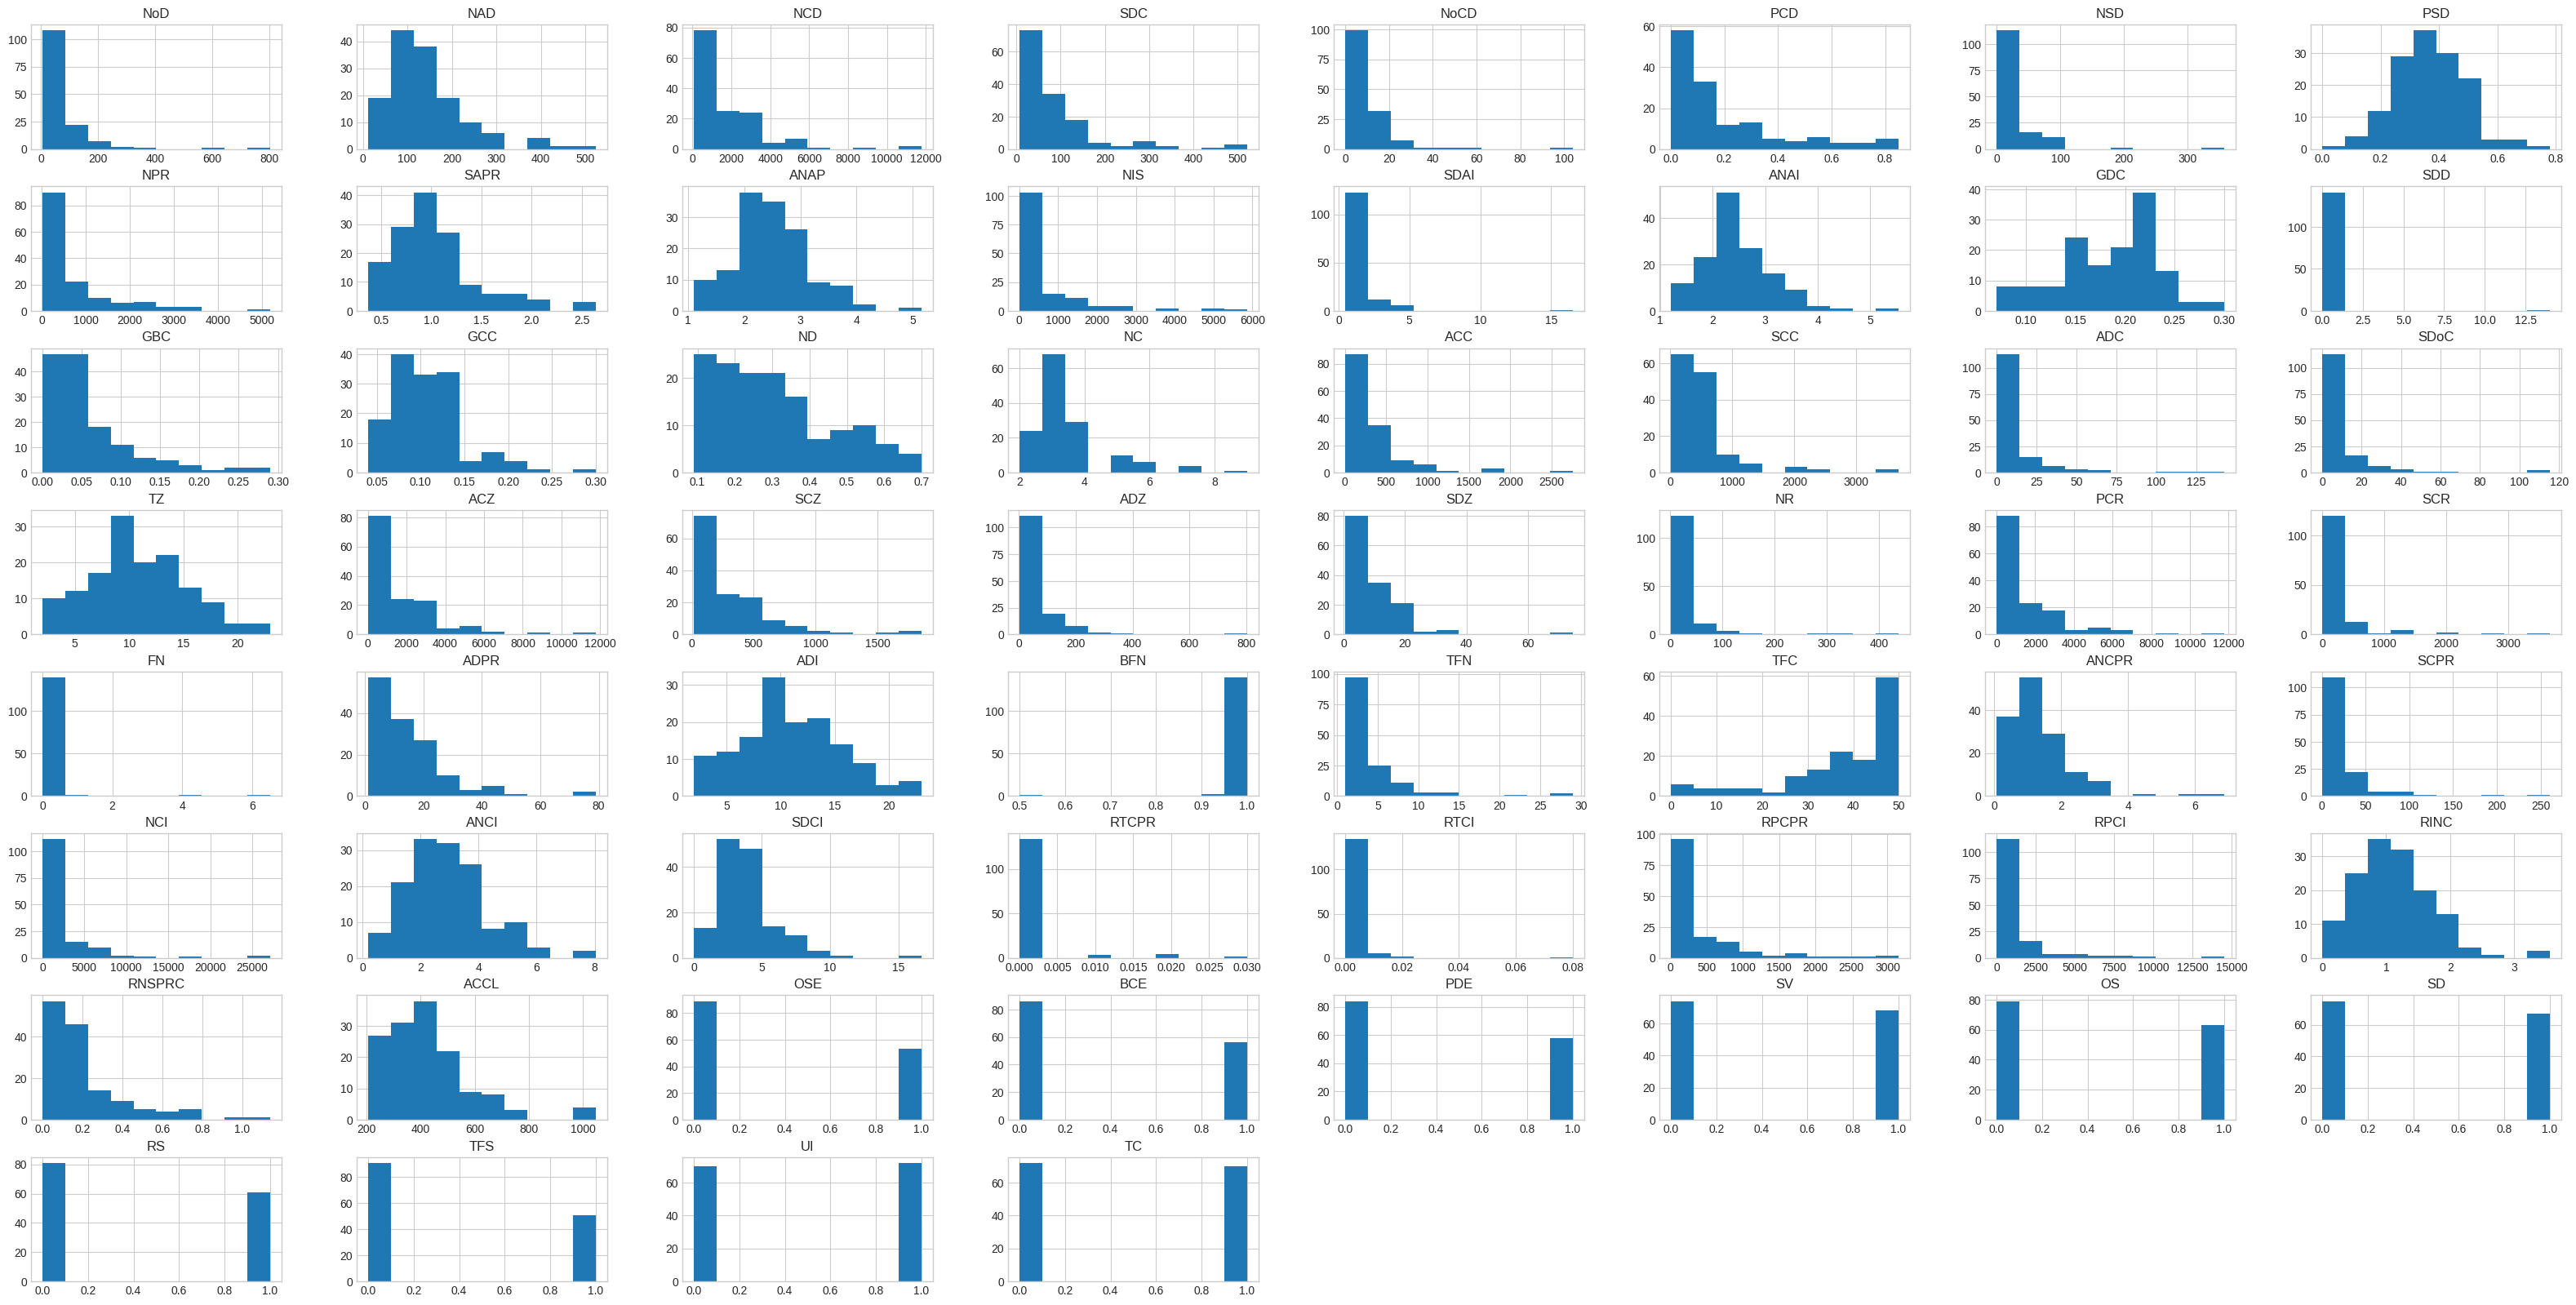

In [ ]:
#controllo bilanciamento
df.hist()
plt.show()

DEFINIZIONE CLASSE METRICS

In [ ]:
#oggetto che contiene le metriche
class Metrics1:
  #costruttore
  def __init__(self,precision,recall,accuracy,mcc):
    self.precision=precision
    self.recall=recall
    self.accuracy=accuracy
    self.mcc=mcc
  
  #ToString
  def __str__(self):
    return f'Metrics [precision= {self.precision} recall= {self.recall} accuracy= {self.accuracy} mcc= {self.mcc}'

In [ ]:
import numpy as np
class MetricsResultContainer:
  meanPrecision = []
  meanRecall = []
  meanAccuracy = []
  meanMcc =[]
  #costruttore
  def __init__(self,model,alg,scaler,param,metricsMean,balance):
    self.model=model
    self.alg=alg
    self.scaler=scaler
    self.param=param
    self.metricsMean=metricsMean
    self.meanPrecision = []
    self.meanRecall = []
    self.meanAccuracy = []
    self.meanMcc =[]
    self.balance=balance
  
  def printMetrics(self):
    for m in self.metricsMean:
      self.meanPrecision.append(m.precision)
      self.meanRecall.append(m.recall)
      self.meanAccuracy.append(m.accuracy)
      self.meanMcc.append(m.mcc)
    print("meanPrecision=",np.mean(self.meanPrecision))    
    print("meanRecall=",np.mean(self.meanRecall))    
    print("meanAccuracy=",np.mean(self.meanAccuracy))
    print("meanMcc=",np.mean(self.meanMcc))

DIVISIONE TRANING AND TEST, FEATURE SELECTION, FEATURE SCALING AND DEFINITION FUNCTION GENERATE MODEL

In [ ]:
import copy
from sklearn import metrics, clone
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,RepeatedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler

def generateModel(model,alg):
  #array di metriche (precision, recall, accuracy, mcc)
  metrics1 = []
  #generazione n_split test/trainig sets
  for train_index, test_index in alg.split(variabileIndipendenti,variabileDipendente):
    clone_model = clone(model)
    X_train, X_test = variabileIndipendenti.iloc[train_index], variabileIndipendenti.iloc[test_index]
    Y_train, Y_test = variabileDipendente.iloc[train_index], variabileDipendente.iloc[test_index]
    select=SelectKBest(score_func=f_classif,k=10)
    scaler=MinMaxScaler()
    #Data Balancing
    oversample = RandomOverSampler(random_state=42)
    X_train_over, y_train_over= oversample.fit_resample(X_train, Y_train)
    #Stampa Data Balancing
   # y_train_over.hist()
   # plt.show()
    #feature scaling sui traing test
    X_train_z = scaler.fit_transform(X_train_over)
    X_test_z = scaler.transform(X_test)
    #applicazione feature selection su train_z
    X_train_z = select.fit_transform(X_train_z, y_train_over)
    X_test_z = select.transform(X_test_z)
    #training dell'algoritmo sui training set
    clone_model.fit(X_train_z,y_train_over)
    #validazione modello e applicazione predizione sui testSet
    y_pred =clone_model.predict(X_test_z)
    #calcolo metriche predizion
    cm=metrics.confusion_matrix(Y_test,y_pred)
    TP, FP, TN, FN = perf_measure(cm)
    metrics1.append(Metrics1((TP/(TP+FP)),(TP/(TP+FN)),
                            ((TP+TN)/(TP+TN+FP+FN)),
                            metrics.matthews_corrcoef(Y_test,y_pred)))
  return metrics1

#divisione dipendente e indipendente
variabileDipendente=df.BCE
lb=LabelEncoder()
variabileIndipendenti=df[['NoD','NAD','NCD','SDC','NoCD','PCD','NSD','PSD','NPR','SAPR','ANAP','NIS','SDAI','ANAI','GDC','SDD','GBC','GCC','ND','NC','ACC','SCC','ADC','SDoC','TZ','ACZ','SCZ','ADZ','SDZ','NR','PCR','SCR','FN','ADPR','ADI','BFN','TFN','TFC','ANCPR','SCPR','NCI','ANCI','SDCI','RTCPR','RTCI','RPCPR','RPCI','RINC','RNSPRC','ACCL']]


#numero record nel dataset
k=len(df)
#calcolo k ideale da usare nelle tecniche di validazione
k= (k/(k*0.3))
#rKf con k gruppi, e 10 ripetizioni
rkf = RepeatedKFold(n_splits=int(np.ceil(k)), n_repeats=10, random_state=42)
#risultati: array di array di metriche
metricsResults = []



FUNZIONE PER VALUTARE LE METRICHE

In [ ]:
def perf_measure(confusionMatrix):
  meanTP = []
  meanFP = []
  meanTN = []
  meanFN = []

  #calcolo TP FP TN FN dalla matrice di confusione
  for i in range(len(confusionMatrix)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for y in range(len(confusionMatrix)): 
      if i==y:
        TP += confusionMatrix[i][y]
      if i!=y:
        FP += confusionMatrix[y][i]
        FN += confusionMatrix[i][y]
    for j in range(len(confusionMatrix)):
      for x in range(len(confusionMatrix)):
        if j!=i and x!= i:
          TN += confusionMatrix[j][x]
    meanTP.append(TP)
    meanFP.append(FP)
    meanTN.append(TN)
    meanFN.append(FN)
  return(np.mean(meanTP), np.mean(meanFP), np.mean(meanTN), np.mean(meanFN))

ALGORITIMO EVALUATION OF RANDOM FOREST CLASSIFICATION

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

print("Random Forest - MinMax Normalization - KF-OverSampler")
#Random Fores K-Fold e MinMax Over sampler
m = MetricsResultContainer("RandomForest","KF","Minmax","Default",
  generateModel(RandomForestClassifier(),rkf),"overSampler"
)
metricsResults.append(m)
m.printMetrics()

Random Forest - MinMax Normalization - KF-OverSampler
meanPrecision= 0.6386111111111111
meanRecall= 0.6386111111111111
meanAccuracy= 0.6386111111111111
meanMcc= 0.24427194583725478


ALGORITIMO EVALUATION OF DECISION TREE CLASSIFICATION

In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

print("DecisionTreeClassifier - MinMax Normalization - KF-OverSampler")
#Random Fores K-Fold e MinMax Over sampler
m = MetricsResultContainer("DecisionTreeClassifier","KF","Minmax","Default",
  generateModel(DecisionTreeClassifier(),rkf),"overSampler"
)
metricsResults.append(m)
m.printMetrics()

DecisionTreeClassifier - MinMax Normalization - KF-OverSampler
meanPrecision= 0.5710119047619047
meanRecall= 0.5710119047619047
meanAccuracy= 0.5710119047619047
meanMcc= 0.11927727727010498


IMPLEMENTAZIONE DEL MODELLO DI CLASSIFICAZIONE CON L'ALGORITMO

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
def FinalModel():
  features_name=[]
  indipendenti=[]
  probabilita=[]
  y_pred=[]
  modello=[]
  for train_index, test_index in rkf.split(variabileIndipendenti,variabileDipendente):
    X_train, X_test = variabileIndipendenti.iloc[train_index], variabileIndipendenti.iloc[test_index]
    Y_train, Y_test = variabileDipendente.iloc[train_index], variabileDipendente.iloc[test_index]
    select=SelectKBest(score_func=f_classif,k=10)
    scaler=MinMaxScaler()
    #Data Balancing
    oversample = RandomOverSampler(random_state=42)
    X_train_over, y_train_over= oversample.fit_resample(X_train, Y_train)
    #feature scaling sui traing test
    X_train_z = scaler.fit_transform(X_train_over)
    X_test_z = scaler.transform(X_test)
    #applicazione feature selection su train_z
    X_train_z = select.fit_transform(X_train_z, y_train_over)
    X_test_z = select.transform(X_test_z)
    #training dell'algoritmo sui training set
    model=RandomForestClassifier()
    model.fit(X_train_z,y_train_over)
    features_name.append(select.get_feature_names_out(input_features=X_train_over.columns.values))
    indipendenti.append(X_test_z)
    probabilita.append(model.predict_proba)
    modello.append(model)
    y_pred.append(model.predict(X_test_z) )
  return features_name,indipendenti,probabilita,modello,y_pred

SHAP

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.9 MB/s eta 0:00:00


['SDC' 'NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'ACCL']


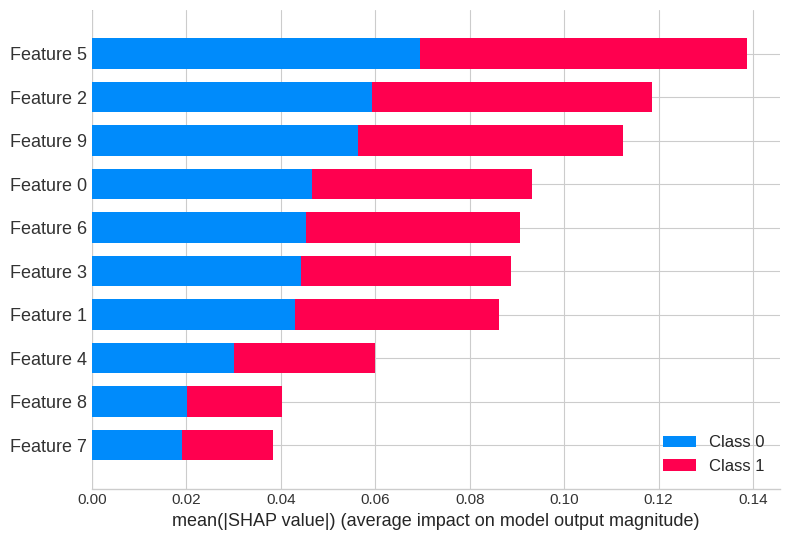

['NoD' 'NCD' 'PCD' 'SAPR' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI']


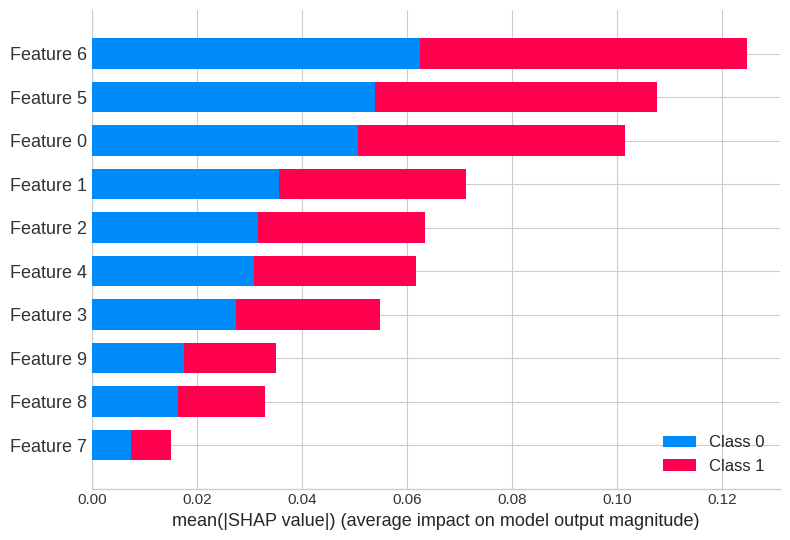

['NoCD' 'PCD' 'PSD' 'SDAI' 'ANAI' 'GDC' 'GCC' 'ND' 'NC' 'ADI']


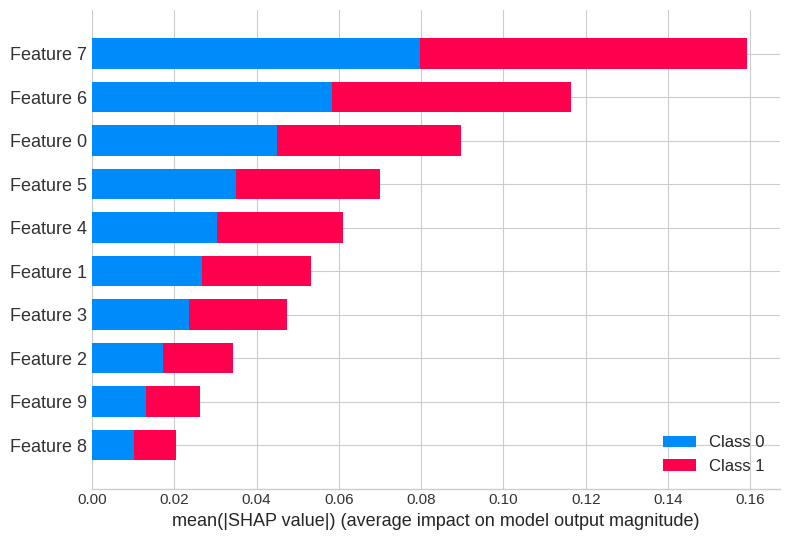

['NoCD' 'PCD' 'PSD' 'GDC' 'GCC' 'ND' 'NC' 'ADC' 'TZ' 'ADI']


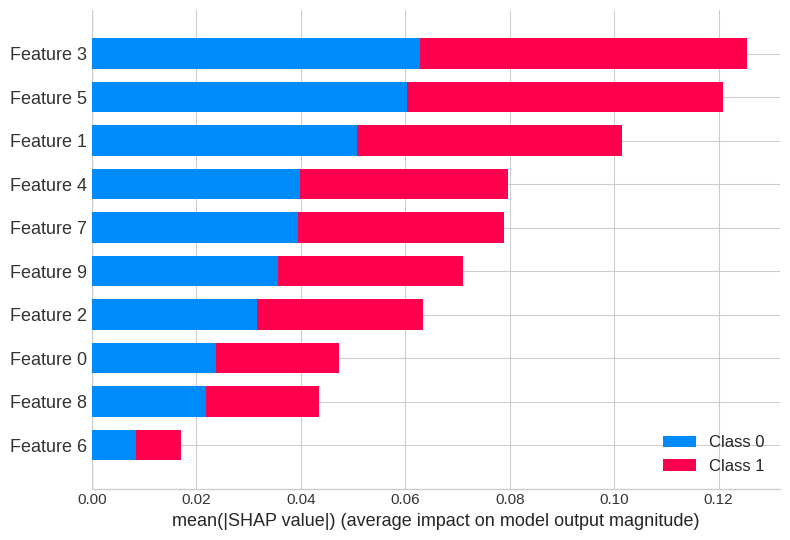

['NAD' 'SDC' 'PCD' 'PSD' 'GDC' 'GCC' 'ND' 'NC' 'NR' 'ADI']


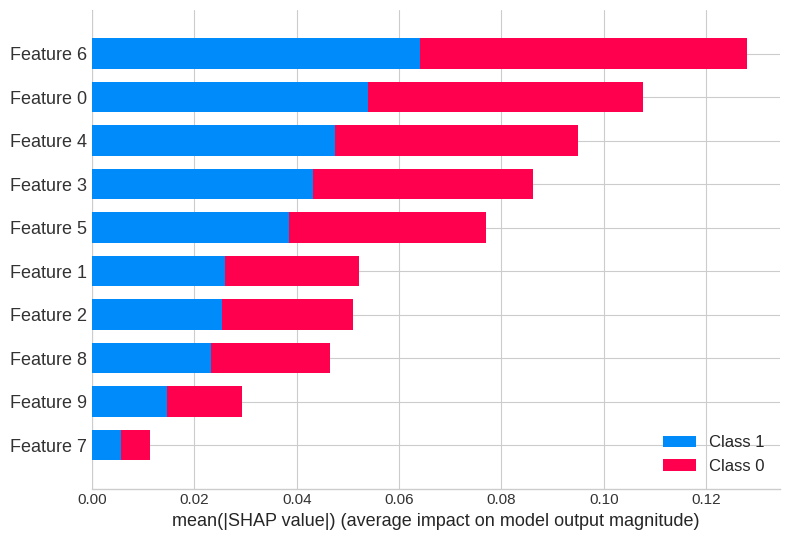

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'ANCI' 'RINC']


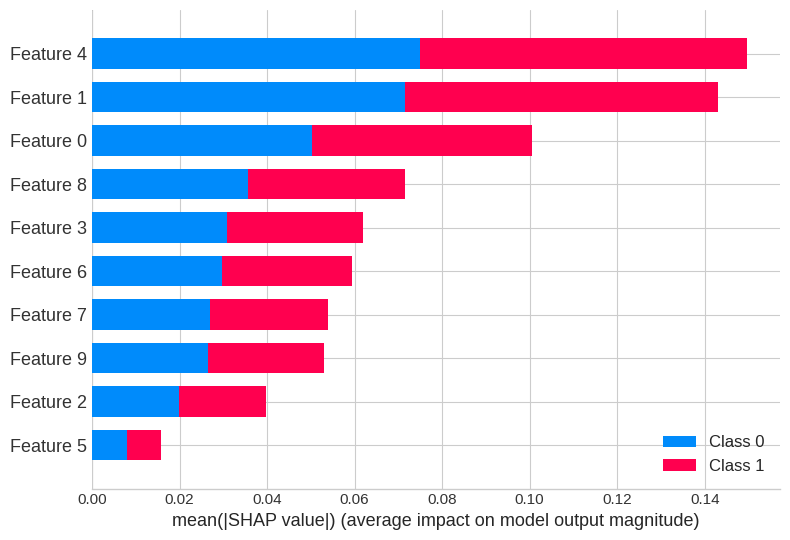

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ACZ' 'PCR' 'ADI']


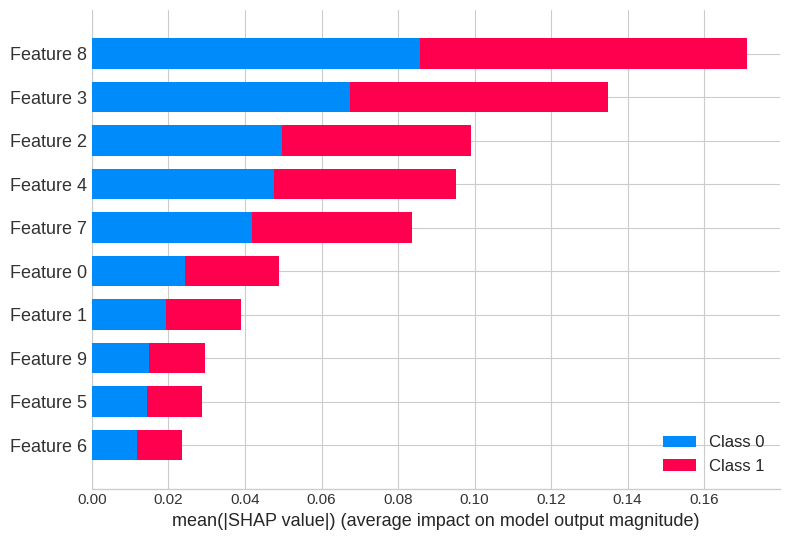

['SDC' 'NoCD' 'PCD' 'SAPR' 'GDC' 'ND' 'NC' 'ADI' 'ANCPR' 'ACCL']


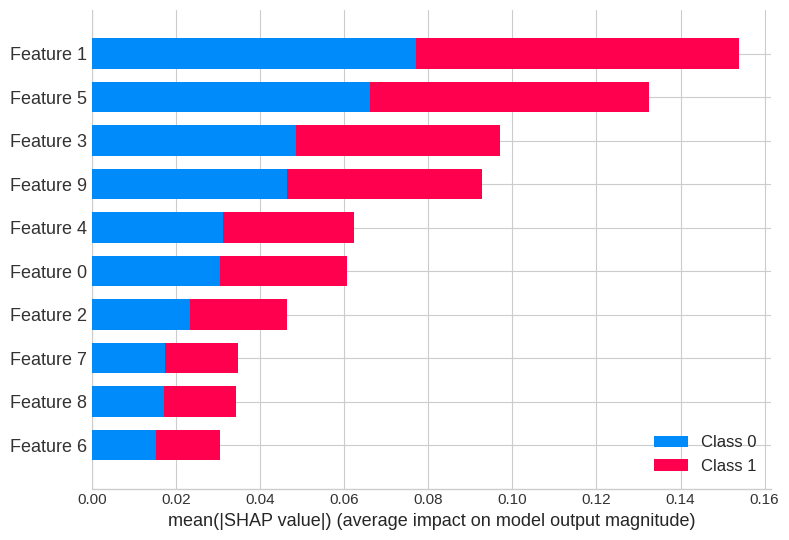

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ACZ' 'NR' 'ADI']


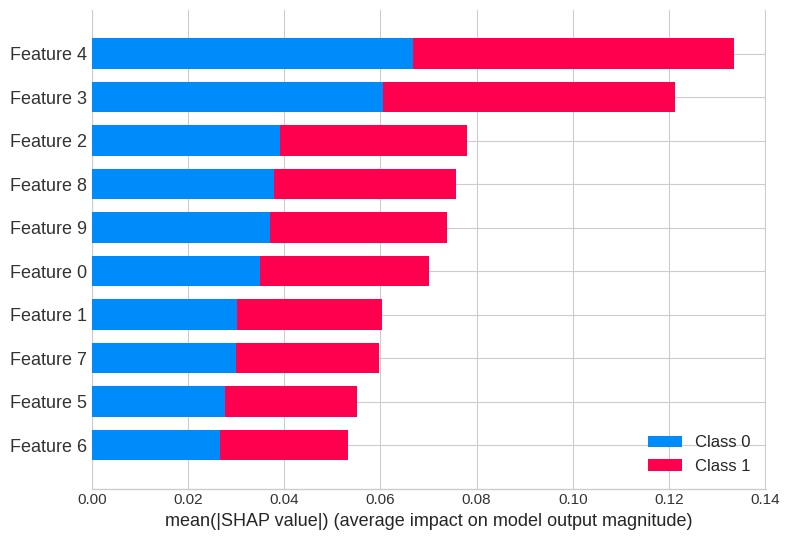

['NoD' 'PCD' 'NSD' 'GDC' 'GCC' 'ND' 'NC' 'SDoC' 'ADZ' 'ADI']


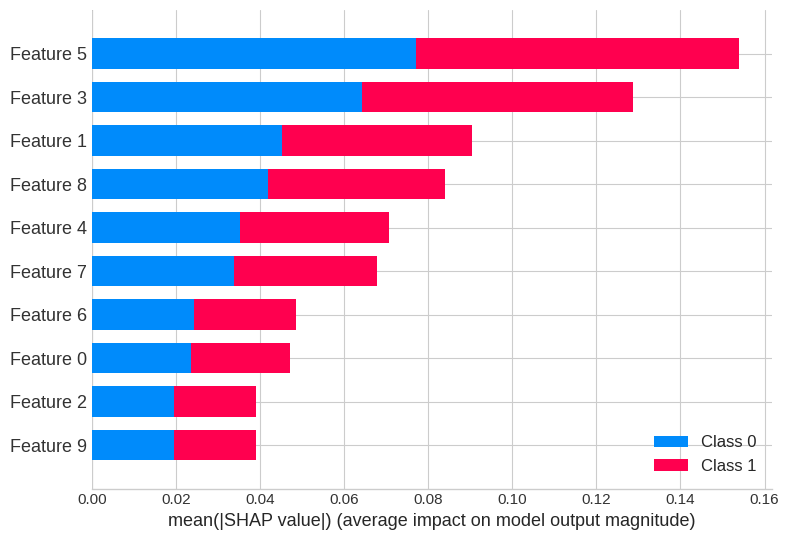

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'TZ' 'ADI' 'ANCI' 'RINC' 'ACCL']


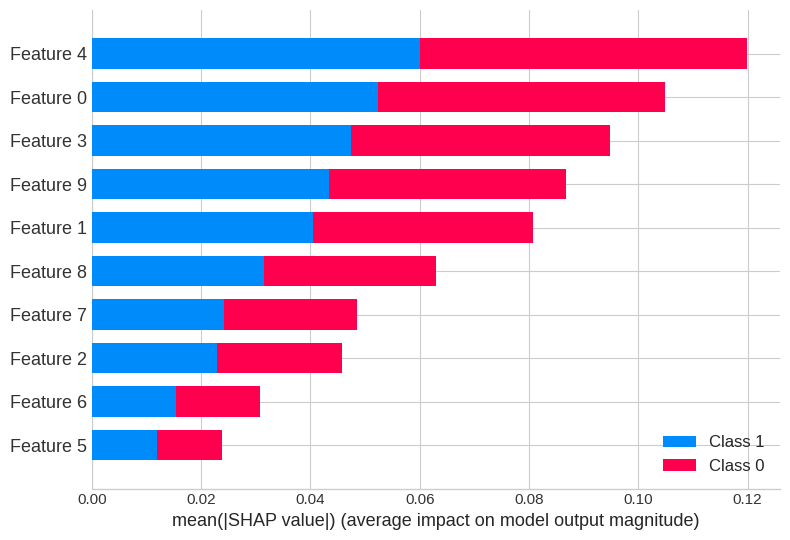

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'ADC' 'TZ' 'ADI' 'TFN']


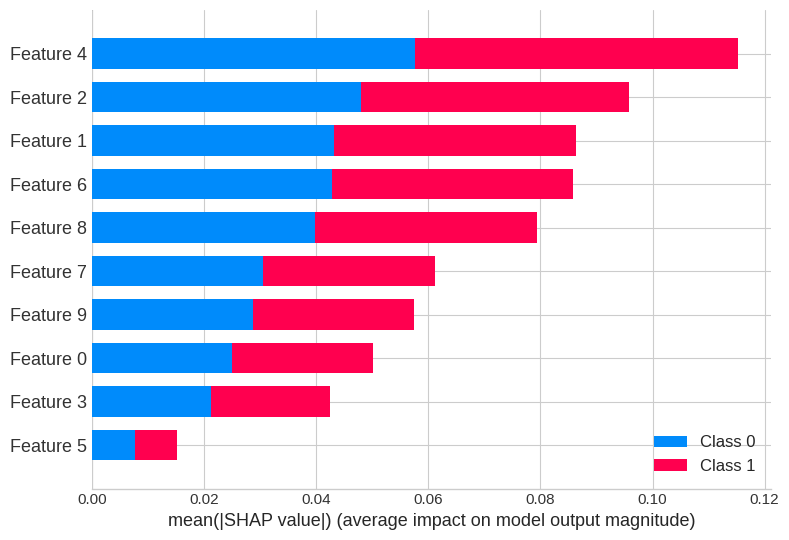

['NoCD' 'PCD' 'GDC' 'ND' 'NC' 'ADC' 'TZ' 'ADI' 'ANCPR' 'ACCL']


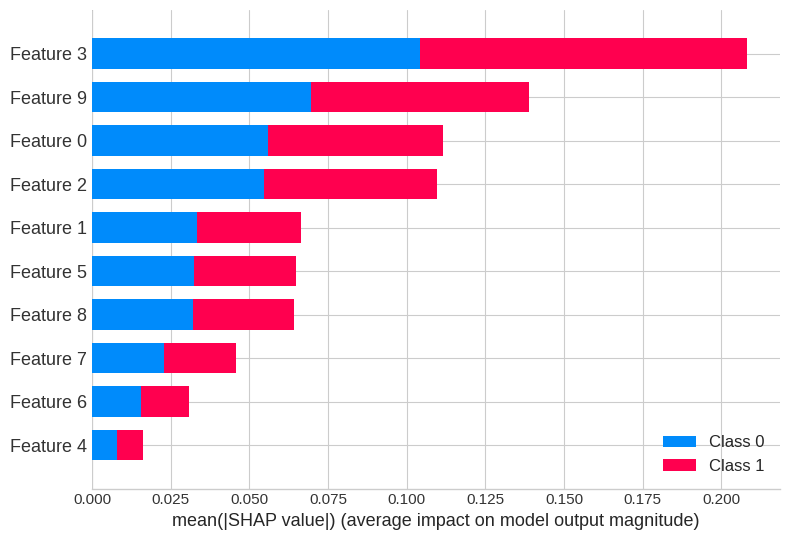

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'RTCPR' 'RINC']


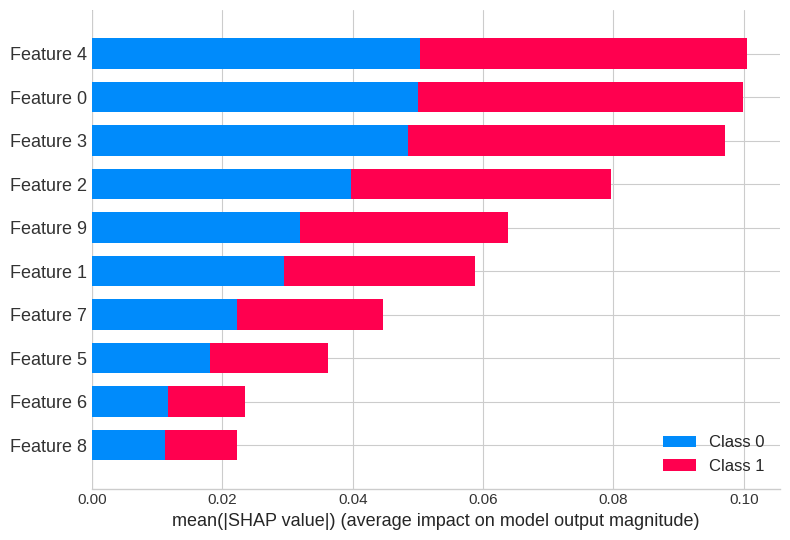

['NoCD' 'PCD' 'NSD' 'PSD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI']


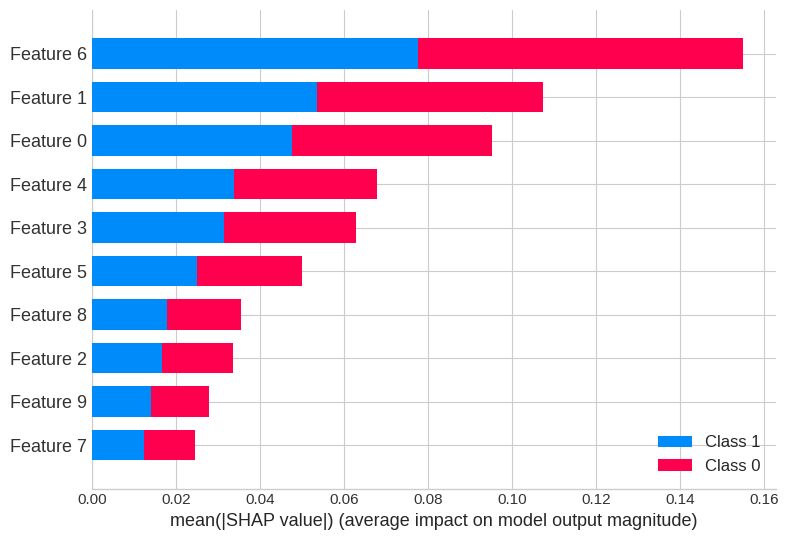

['NoCD' 'PCD' 'PSD' 'GDC' 'GCC' 'ND' 'ACZ' 'ADPR' 'ADI' 'TFN']


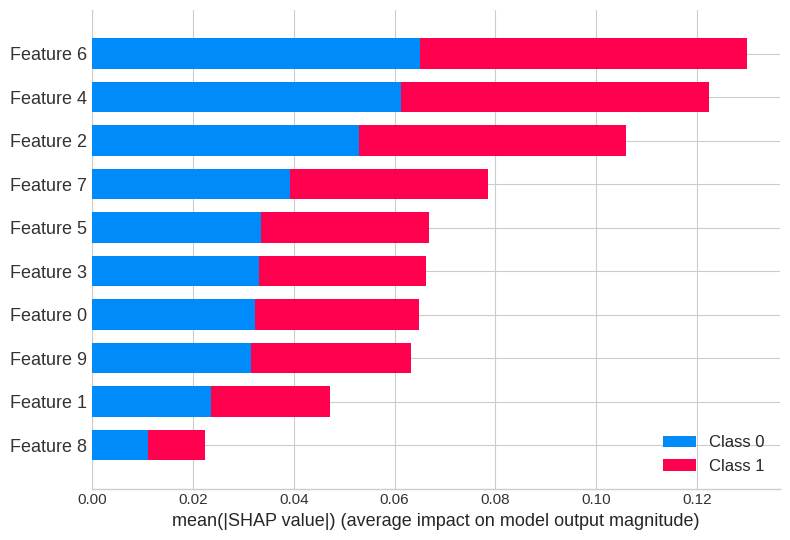

['NoCD' 'PCD' 'PSD' 'GDC' 'GCC' 'ND' 'NC' 'ADC' 'TZ' 'ADI']


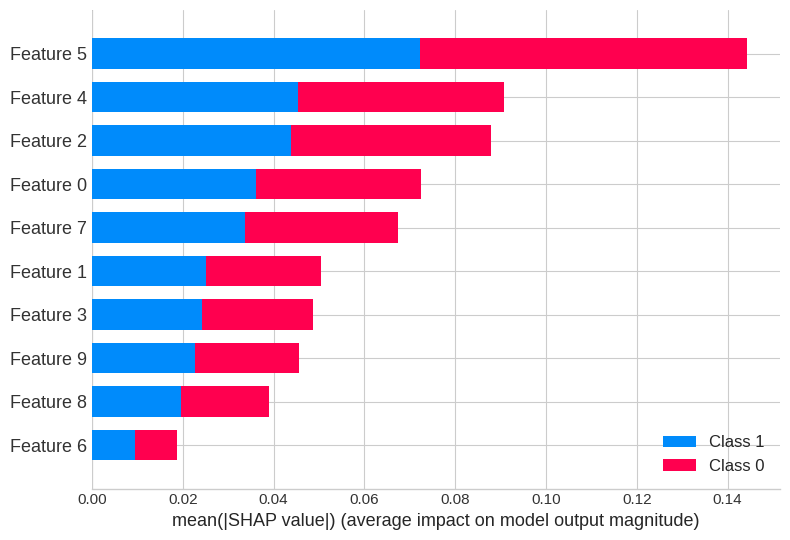

['NoD' 'PCD' 'NSD' 'GDC' 'GCC' 'ND' 'SDoC' 'TZ' 'ADZ' 'ADI']


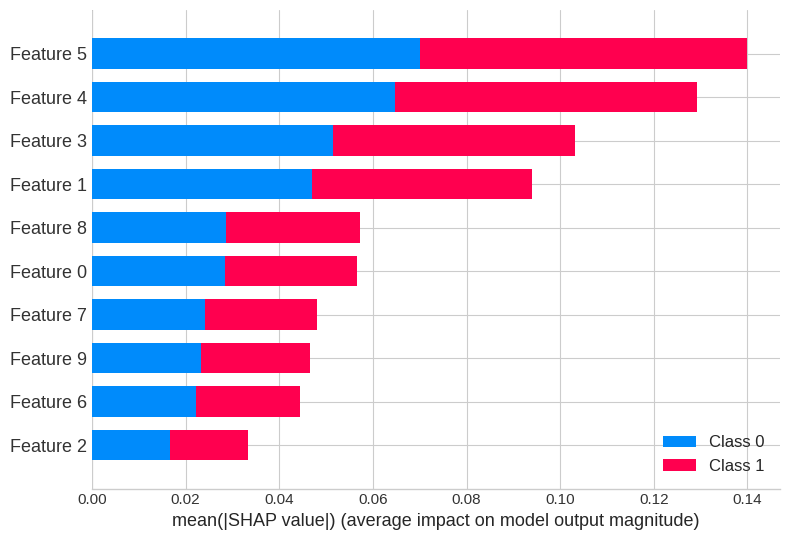

['SDC' 'NoCD' 'PCD' 'GDC' 'ND' 'NC' 'ADPR' 'ADI' 'ANCI' 'RINC']


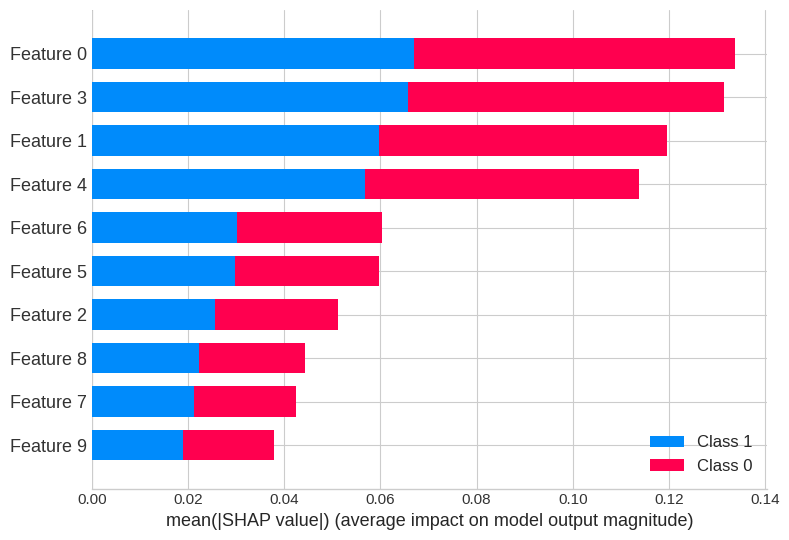

['NoCD' 'PCD' 'PSD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'ANCI']


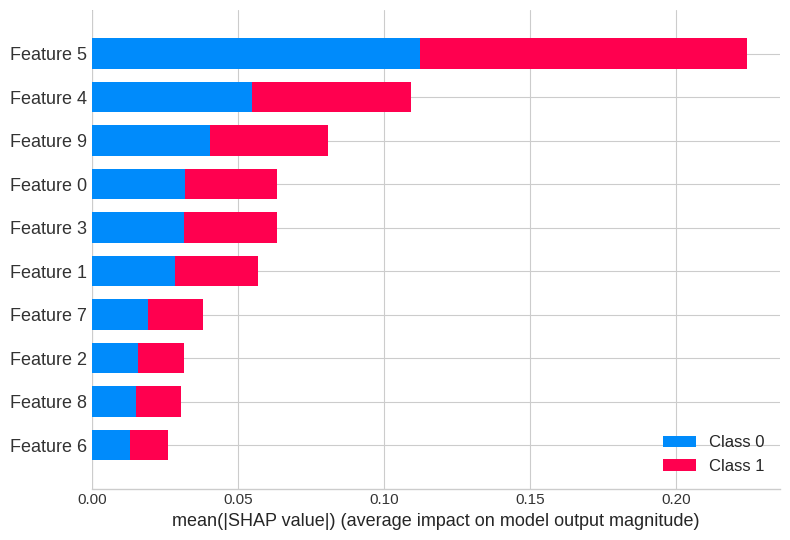

['SDC' 'NoCD' 'PCD' 'PSD' 'GDC' 'ND' 'NC' 'SCZ' 'TFN' 'ACCL']


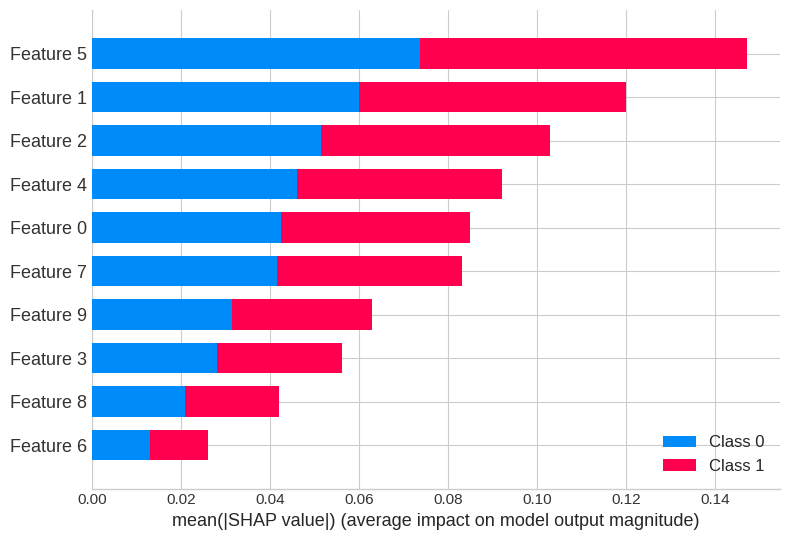

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'NR' 'ADI' 'RTCPR']


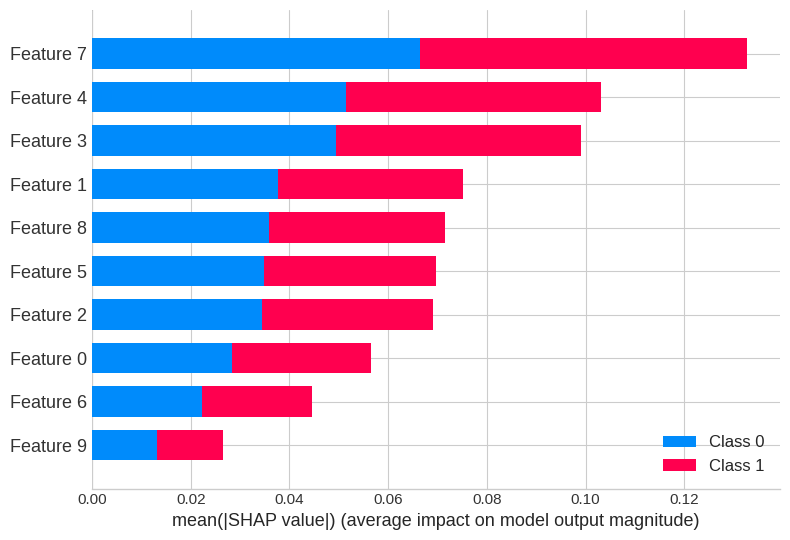

['NoD' 'NoCD' 'PCD' 'SAPR' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI']


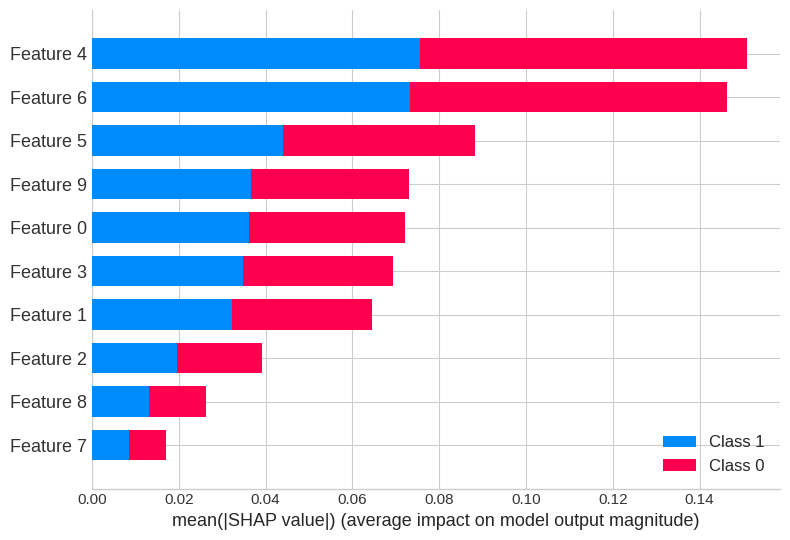

['NoD' 'NoCD' 'PCD' 'NSD' 'SDAI' 'GDC' 'GCC' 'ND' 'ACZ' 'ACCL']


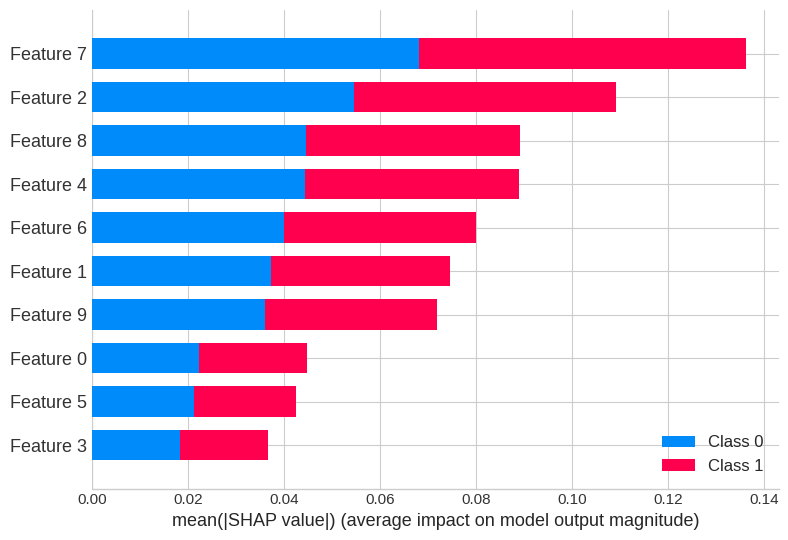

['NAD' 'NoCD' 'PCD' 'PSD' 'GDC' 'ND' 'NC' 'ANCPR' 'ANCI' 'RINC']


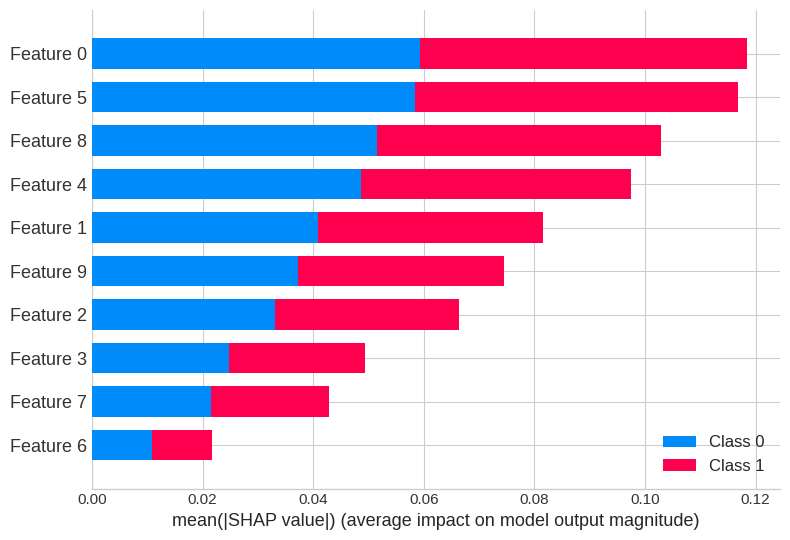

['NoCD' 'PCD' 'SDAI' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'ANCI']


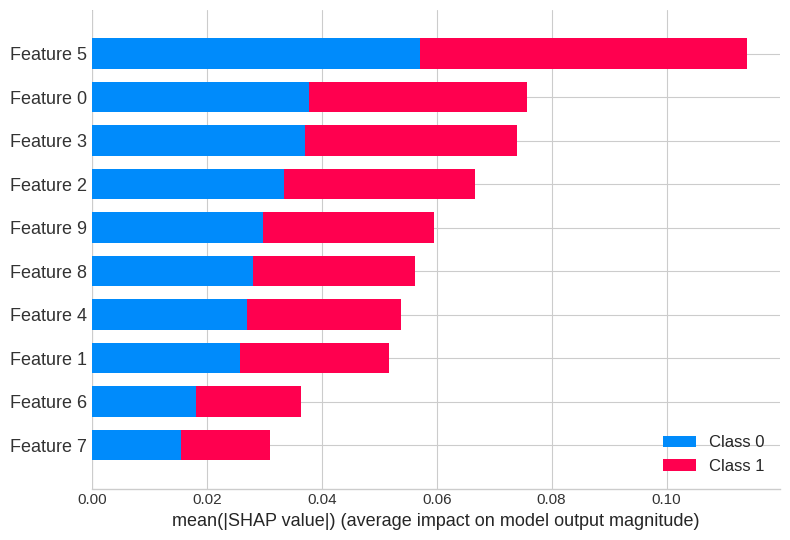

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADPR' 'ADI' 'ACCL']


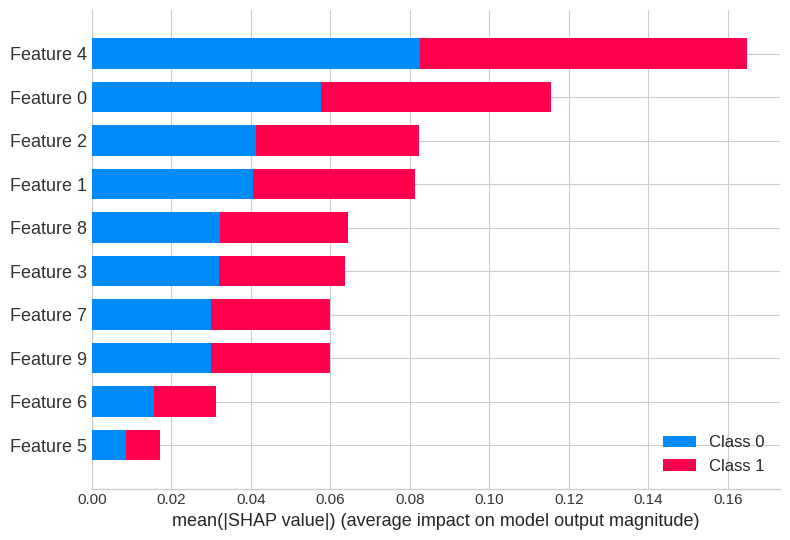

['NoD' 'PCD' 'NSD' 'SAPR' 'GDC' 'ND' 'NC' 'SDoC' 'ADZ' 'ADI']


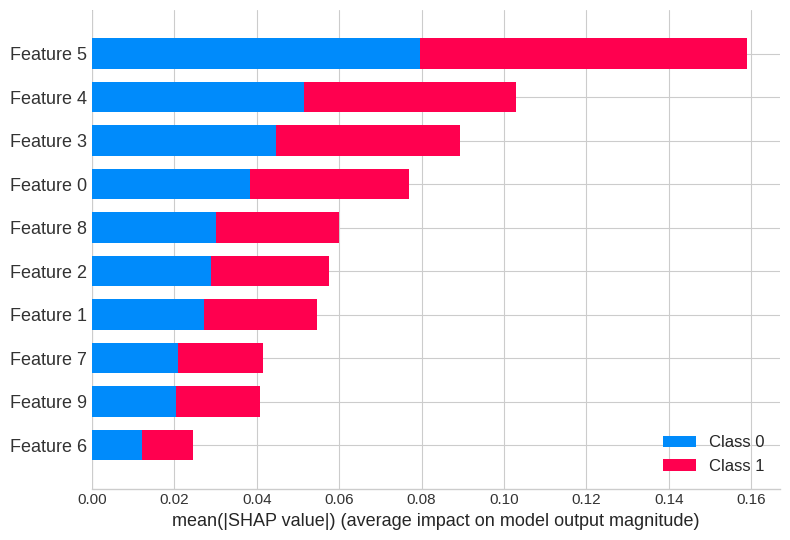

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'ACZ' 'ADI' 'TFN' 'ACCL']


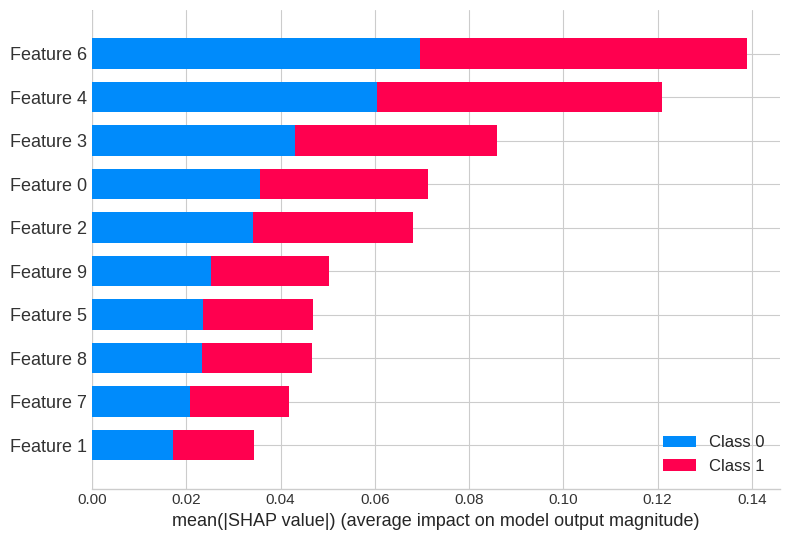

['NoD' 'PCD' 'NSD' 'SAPR' 'GDC' 'ND' 'NC' 'TZ' 'ADZ' 'ADI']


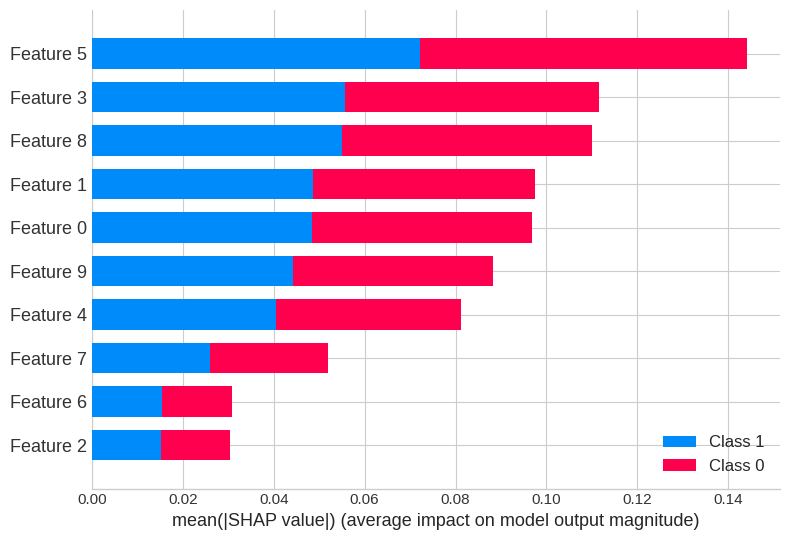

['NoCD' 'PCD' 'PSD' 'GDC' 'GCC' 'ND' 'NC' 'ACZ' 'ADI' 'ANCPR']


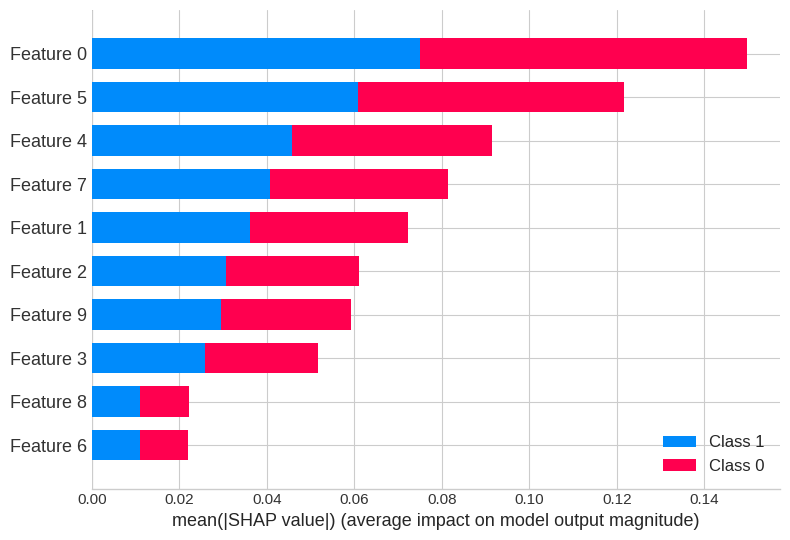

['NoCD' 'PCD' 'PSD' 'SAPR' 'GDC' 'GCC' 'ND' 'NC' 'ADPR' 'ANCI']


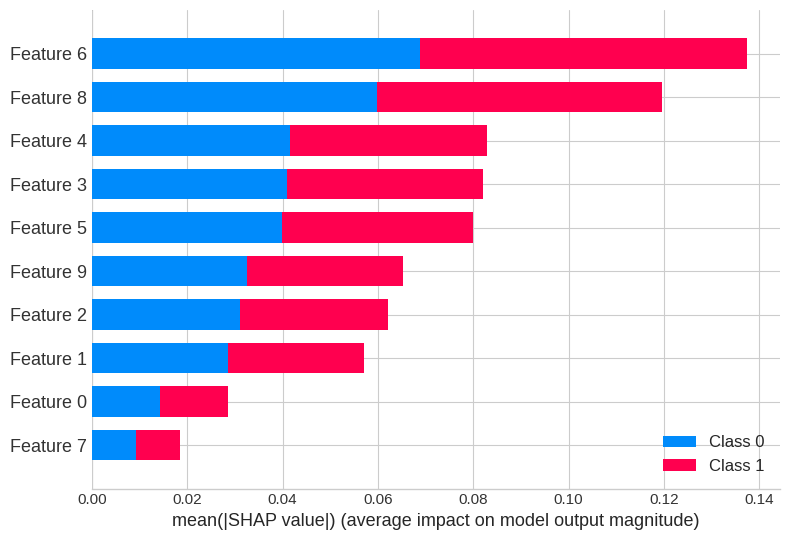

['NAD' 'NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ACZ' 'ADI']


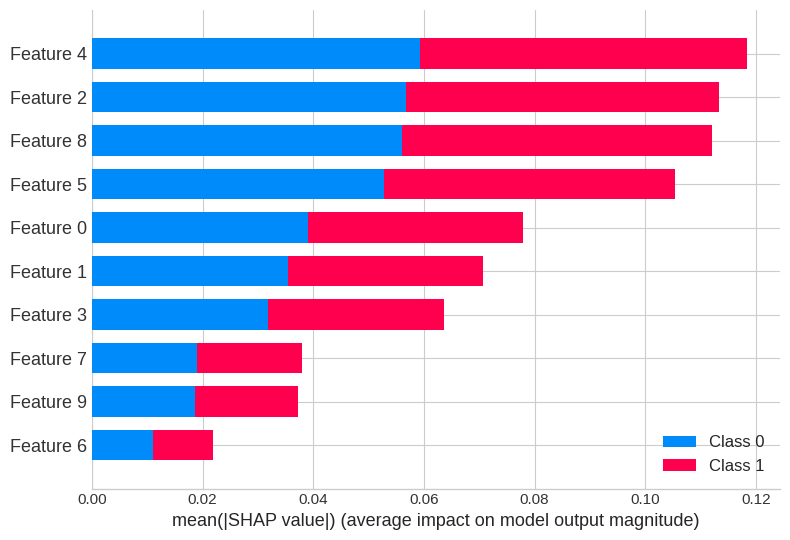

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'ANCPR' 'ANCI']


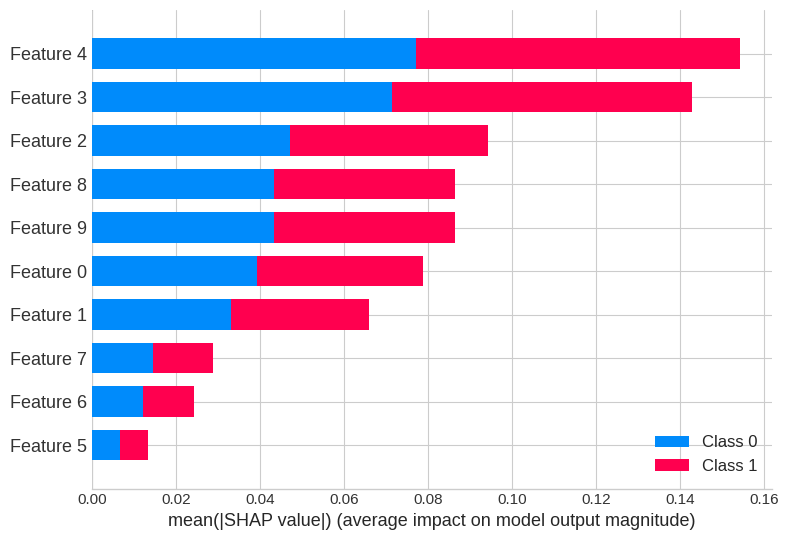

['NoD' 'PCD' 'NSD' 'SDAI' 'GDC' 'ND' 'NC' 'TZ' 'ADZ' 'ADI']


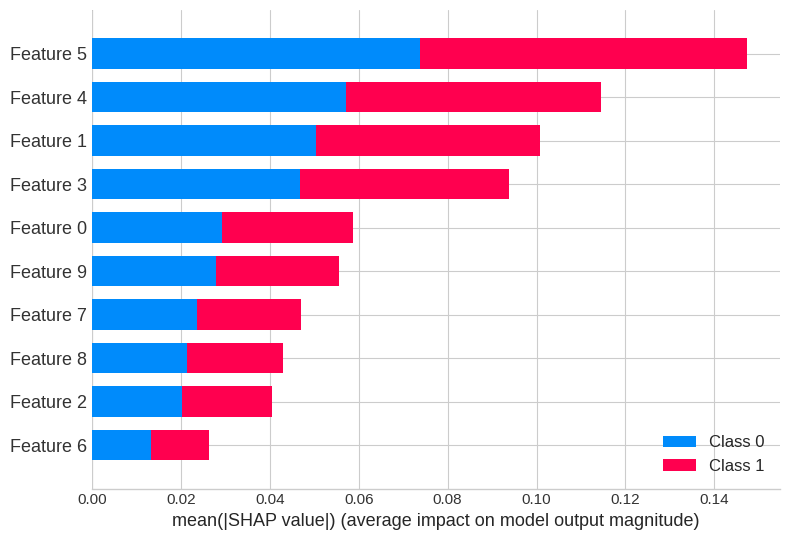

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'PCR' 'ADI' 'ANCPR']


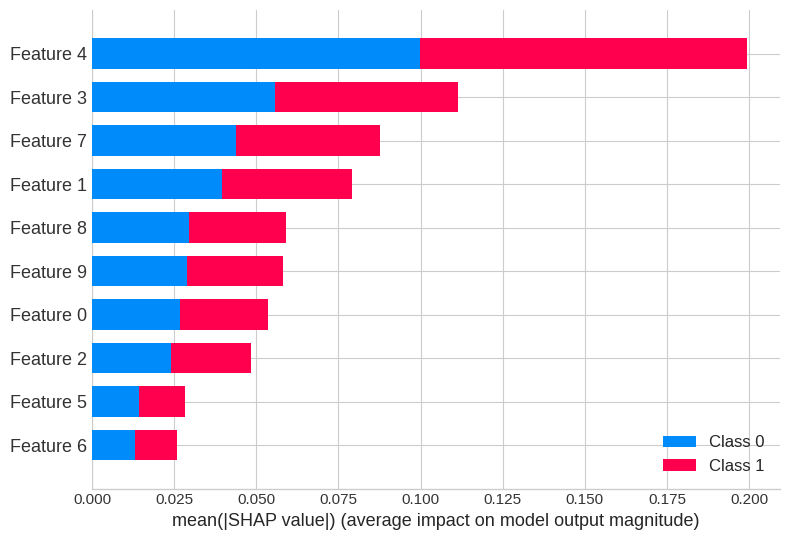

['NAD' 'SDC' 'NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'SCZ' 'ADI']


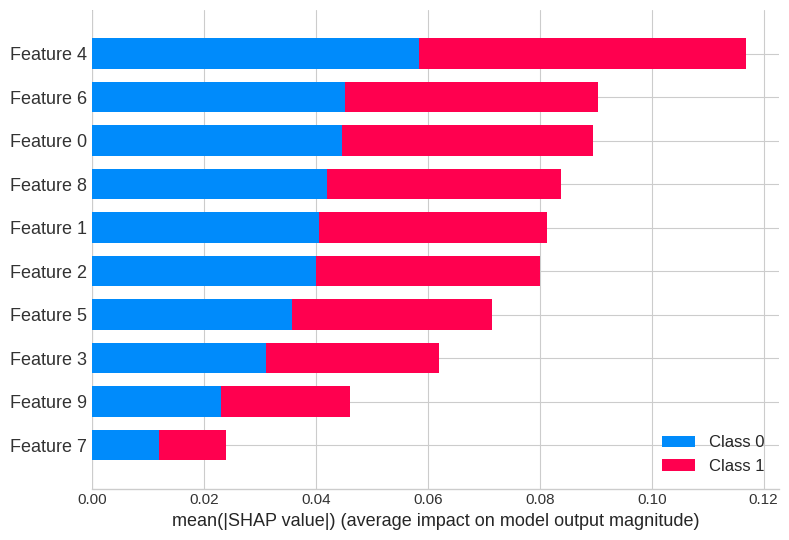

['NoCD' 'PCD' 'GDC' 'GCC' 'ND' 'NC' 'TZ' 'ADI' 'ANCPR' 'ACCL']


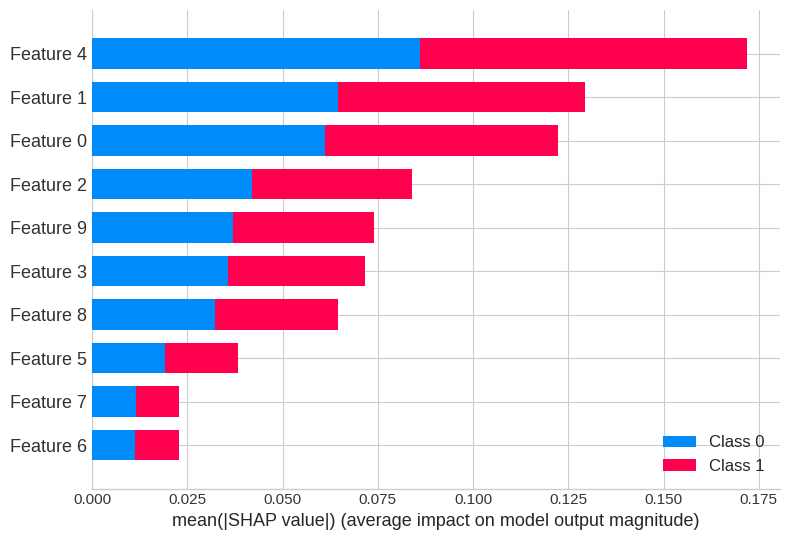

['NoD' 'PCD' 'SAPR' 'NIS' 'GDC' 'GCC' 'ND' 'TZ' 'ADI' 'NCI']


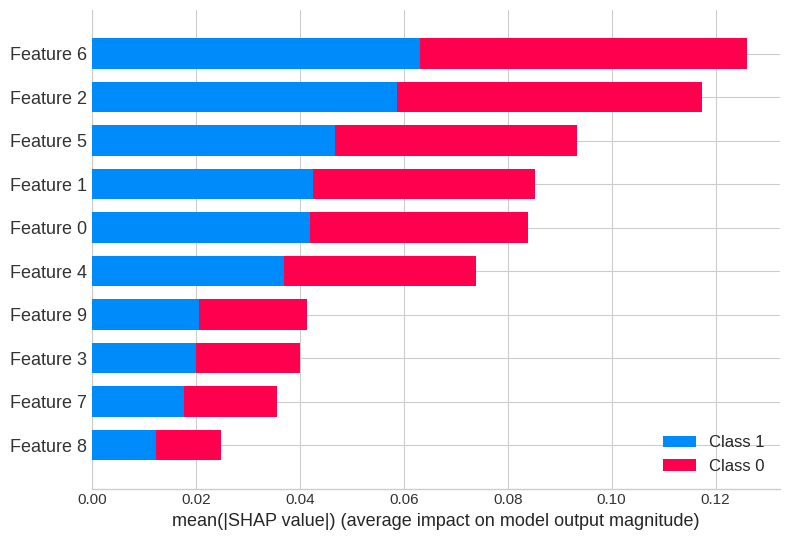

['NoD' 'PCD' 'NSD' 'GDC' 'GCC' 'ND' 'TZ' 'ADI' 'ANCI' 'RINC']


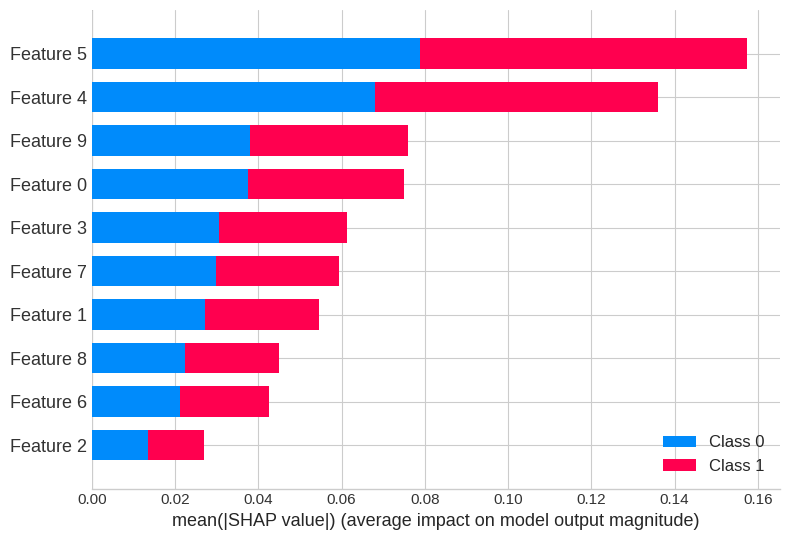

In [ ]:
import shap

# predizione
features_name,indipendenti,probabilita,modello,y_pred=FinalModel()
for i in range(len(indipendenti)):
 print(features_name[i])
 explainer = shap.TreeExplainer(modello[i])
 shap_values = explainer.shap_values(indipendenti[i])
 #stampa
 shap.summary_plot(shap_values,indipendenti[i],plot_type='bar')

LIME

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=76b74bd5e64330572fed4bf4ac36b45db77de5186a8bf89b84ff2f928dabd2bc
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import sklearn
import sklearn.ensemble
import numpy as np

features_name,indipendenti,probabilita,modello,y_pred=FinalModel()
for i in range(len(indipendenti)):
 print(features_name[i])
 explainer = lime.lime_tabular.LimeTabularExplainer(indipendenti[i], feature_names=features_name[i], categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49], 
                                                   verbose=True, mode='classification')
 exp = explainer.explain_instance(indipendenti[i][0],probabilita[i],num_features=50)
 exp.show_in_notebook(show_table=True)
 exp.as_list()